In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                   
from sklearn import preprocessing
from sklearn import utils
import sys

In [2]:
ds=pd.read_csv(r"/Users/shama/Desktop/Train_dataset2.csv")


In [3]:
ds

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob,Infect_Prob1
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1,Farmer,Public,2,...,233,82,58,27,7,3600000,1300000,2,49,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2,Farmer,Walk,2,...,328,89,68,5,6,1600000,400000,1,51,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1,Cleaner,Public,2,...,213,77,43,40,6,3400000,900000,1,73,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1,Driver,Car,2,...,275,64,60,27,7,700000,2300000,1,48,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2,Manufacturing,Car,2,...,331,71,64,32,7,3200000,1100000,1,87,87.868800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,22691,Bengaluru,Male,Mr,ashish,NO,2,Business,Car,8,...,209,61,56,35,7,4000000,300000,0,41,41.981760
10710,22692,Bengaluru,Male,Mr,mohd mujahid ansari,YES,0,Manufacturing,Car,8,...,211,65,47,35,7,1500000,700000,2,47,47.148663
10711,22693,Bengaluru,Male,Mr,munnakumar,YES,0,Clerk,Public,8,...,296,87,37,16,5,3000000,2100000,2,47,47.708533
10712,22694,Bengaluru,Male,Mr,prakash,YES,1,Legal,Walk,8,...,253,56,70,28,5,2900000,700000,1,53,53.803565


In [4]:
ds=ds.drop(columns=["Name","Pulmonary score 1","cardiological pressure1","Designation"])

In [5]:
ds['Infect_Prob'] = pd.to_numeric(ds['Infect_Prob'], errors='coerce')

In [6]:
ds

,people_ID,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob,Infect_Prob1
0,1,Bhubaneshwar,Female,YES,1,Farmer,Public,2,0,Hypertension,...,233,82,58,27,7,3600000,1300000,2,49,49.135010
1,2,Bhubaneshwar,Female,YES,2,Farmer,Walk,2,0,Diabetes,...,328,89,68,5,6,1600000,400000,1,51,51.147880
2,3,Bhubaneshwar,Female,NO,1,Cleaner,Public,2,0,None,...,213,77,43,40,6,3400000,900000,1,73,73.224000
3,4,Bhubaneshwar,Female,YES,1,Driver,Car,2,0,Coronary Heart Disease,...,275,64,60,27,7,700000,2300000,1,48,48.779225
4,5,Bhubaneshwar,Female,NO,2,Manufacturing,Car,2,0,Diabetes,...,331,71,64,32,7,3200000,1100000,1,87,87.868800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,22691,Bengaluru,Male,NO,2,Business,Car,8,2,Diabetes,...,209,61,56,35,7,4000000,300000,0,41,41.981760
10710,22692,Bengaluru,Male,YES,0,Manufacturing,Car,8,2,None,...,211,65,47,35,7,1500000,700000,2,47,47.148663
10711,22693,Bengaluru,Male,YES,0,Clerk,Public,8,2,Diabetes,...,296,87,37,16,5,3000000,2100000,2,47,47.708533
10712,22694,Bengaluru,Male,YES,1,Legal,Walk,8,2,Coronary Heart Disease,...,253,56,70,28,5,2900000,700000,1,53,53.803565


In [7]:
import seaborn as sms

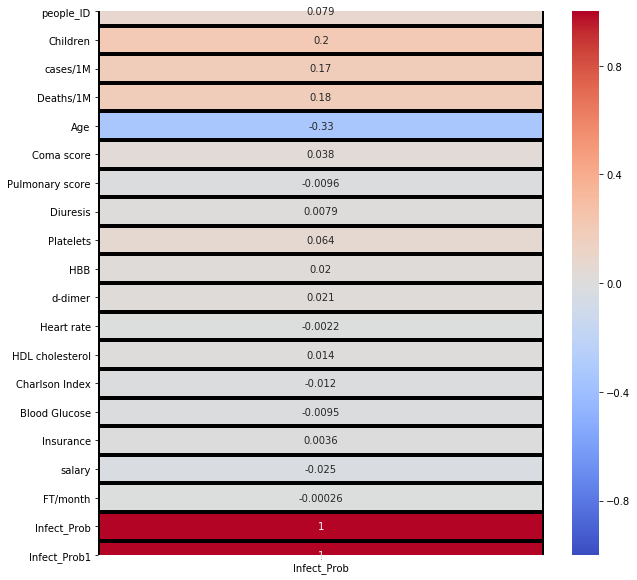

In [8]:
ds_corr=ds.corr()
plt.figure(figsize=(10,10))
sms.heatmap(ds_corr[["Infect_Prob"]],annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

# Higher correlation

People ID,
children,
cases/1m,
deaths/1m,
age,
coma score,
platelets,
hbb,
d-dimer,
salary,

In [9]:
ds=ds.drop(columns=["Pulmonary score","cardiological pressure","Diuresis","Heart rate","HDL cholesterol","Charlson Index","Blood Glucose","Insurance","FT/month"])

In [10]:
x=ds.iloc[:,0:16].values
y=ds.iloc[:,16:17].values

In [11]:
from sklearn.preprocessing import LabelEncoder
ld=LabelEncoder()

In [12]:
x[:,1]=ld.fit_transform(x[:,1])
x[:,2]=ld.fit_transform(x[:,2])
x[:,3]=ld.fit_transform(x[:,3])
x[:,5]=ld.fit_transform(x[:,5])
x[:,6]=ld.fit_transform(x[:,6])
x[:,9]=ld.fit_transform(x[:,9])

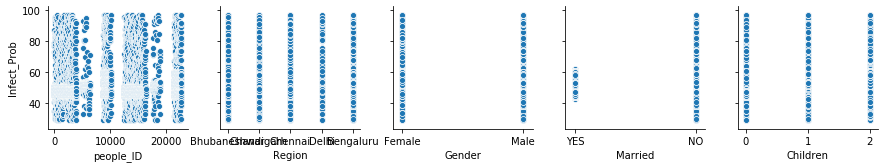

In [13]:
sms.pairplot(ds, x_vars=["people_ID","Region","Gender","Married","Children"], y_vars=["Infect_Prob"])

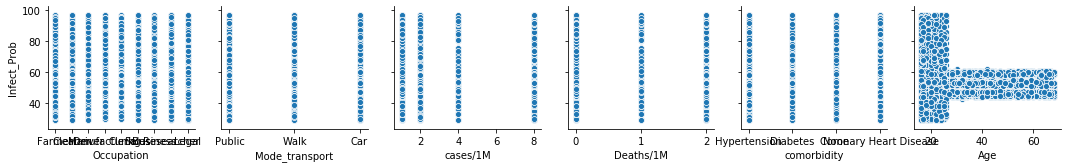

In [14]:
sms.pairplot(ds, x_vars=["Occupation","Mode_transport","cases/1M","Deaths/1M","comorbidity","Age",],
                 y_vars=["Infect_Prob"])

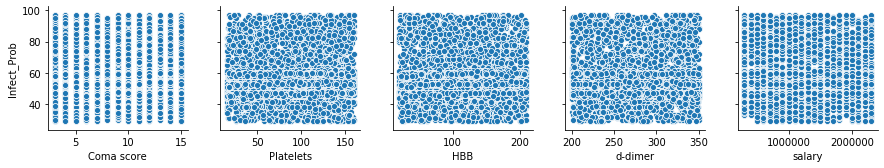

In [15]:
sms.pairplot(ds, x_vars=["Coma score","Platelets","HBB","d-dimer","salary"],
                 y_vars=["Infect_Prob"])

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

# Standardisation

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
train_scaled = scaler.fit_transform(x_train)

In [20]:
test_scaled = scaler.transform(x_test)

# MLP 

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
model = MLPClassifier()

In [23]:
model.fit(train_scaled, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_train, model.predict(train_scaled))

0.6302634308234806

In [26]:
accuracy_score(y_test, model.predict(test_scaled))

0.5018656716417911

# Testing data

In [27]:
ps=pd.read_csv(r"/Users/shama/Desktop/flipr/Test_dataset1.csv")

In [28]:
es=ps

In [29]:
es=es.drop(columns=["Name","Pulmonary score 1","cardiological pressure 1","Designation","Pulmonary score","cardiological pressure","Diuresis","Heart rate","HDL cholesterol","Charlson Index","Blood Glucose","Insurance","FT/month"])

In [30]:
x1=es.iloc[:,0:16].values

In [31]:
x1[:,1]=ld.fit_transform(x1[:,1])
x1[:,2]=ld.fit_transform(x1[:,2])
x1[:,3]=ld.fit_transform(x1[:,3])
x1[:,5]=ld.fit_transform(x1[:,5])
x1[:,6]=ld.fit_transform(x1[:,6])
x1[:,9]=ld.fit_transform(x1[:,9])

In [32]:
x2 = scaler.fit_transform(x1)

In [33]:
y_pred=model.predict(x2)

In [34]:
np.set_printoptions(threshold=sys.maxsize)

In [35]:
y_pred

array([51, 50, 50, 51, 51, 51, 50, 51, 50, 51, 50, 51, 50, 44, 51, 77, 50,
       51, 51, 50, 44, 51, 77, 51, 48, 51, 50, 59, 51, 50, 51, 51, 50, 51,
       50, 44, 51, 50, 51, 42, 50, 50, 50, 51, 50, 51, 50, 50, 44, 50, 48,
       51, 51, 50, 50, 80, 51, 50, 50, 50, 49, 51, 50, 51, 50, 50, 32, 51,
       51, 50, 50, 50, 50, 50, 77, 50, 49, 48, 51, 49, 50, 50, 50, 51, 51,
       44, 40, 50, 50, 51, 49, 50, 51, 86, 49, 50, 44, 50, 50, 31, 51, 50,
       50, 77, 50, 50, 49, 50, 51, 51, 44, 50, 45, 50, 59, 50, 51, 50, 50,
       50, 51, 51, 49, 51, 50, 47, 50, 77, 50, 51, 50, 49, 49, 50, 31, 50,
       29, 50, 51, 50, 40, 50, 49, 50, 40, 56, 50, 51, 50, 50, 50, 49, 50,
       50, 51, 50, 97, 30, 50, 51, 50, 77, 49, 51, 50, 50, 49, 49, 50, 51,
       51, 50, 77, 49, 50, 50, 49, 51, 50, 49, 50, 50, 50, 51, 51, 50, 51,
       31, 50, 50, 50, 49, 34, 50, 49, 49, 51, 49, 50, 50, 50, 51, 29, 32,
       50, 51, 50, 50, 88, 50, 51, 50, 51, 59, 51, 48, 51, 50, 50, 51, 51,
       49, 51, 49, 50, 50

In [36]:
type(y_pred)

numpy.ndarray

# Transfering to Excel

In [37]:
x4=pd.read_csv(r"/Users/shama/Desktop/flipr/Test_dataset1.csv", usecols = ['people_ID'])

In [38]:
type(x4)

pandas.core.frame.DataFrame

In [39]:
dg=pd.DataFrame(x4)

In [40]:
df=pd.DataFrame({'Infect_Prob':y_pred})

In [41]:
writer = pd.ExcelWriter('/Users/shama/Desktop/flipr/result.xlsx',engine='xlsxwriter')
dg.to_excel(writer, sheet_name='Sheet1', startrow=0 , startcol=0)
df.to_excel(writer, sheet_name='Sheet1', startrow=0 , startcol=2,index=False)
writer.save()